**Description**:

This Jupyter notebook is part of the line-of-sight structure-enhanced ray-tracing halos rendering for external convergence and shear, the notebook facilitates computations pertinent to halos and mass sheet corrections.

The crux of the notebook revolves around the introduction of two pivotal correction factors. The first is the external convergence, $ \kappa_{\text{ext}} $, defined by:

$$ 1 - \kappa_{\text{ext}} = \frac{(1-\kappa_{\text{od}})(1-\kappa_{\text{os}})}{1-\kappa_{\text{ds}}} $$

The second correction factor is the external shear, $ \gamma_{\text{ext}} $, described by:

$$ \gamma_{\text{ext}} = \sqrt{(\gamma_{\text{od}1}+\gamma_{\text{os}1}-\gamma_{\text{ds}1})^2+(\gamma_{\text{od}2}+\gamma_{\text{os}2}-\gamma_{\text{ds}2})^2} $$

These corrections are vital for ensuring precise and accurate gravitational lensing measurements under mass sheet degeneracy.

### Importing Necessary Libraries

Here we will import the required libraries and classes that we'll be using in the subsequent steps.

In [1]:
from slsim.Pipelines.halos_pipeline import HalosSkyPyPipeline
from slsim.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
from slsim.Halos.halos_plus_glass import run_kappaext_gammaext_kde_by_multiprocessing

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### Initializing the SkyPy Pipeline

We initialize the `HalosSkyPyPipeline` with specified parameters. This will help us fetch halo information for our simulations.


In [2]:
pipeline = HalosSkyPyPipeline(sky_area=0.0001, m_max='1.0E+16', m_min='1.0E+12', z_max=5.00)
print(pipeline)


### Extracting Halos and Mass Sheet Corrections

Let's extract halo and mass sheet correction data from the initialized pipeline.


In [3]:
halos = pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction

print(halos)

z_halos = halos['z']
mass_halos = halos['mass']

redshifts_mass_correction = mass_sheet_correction['z']
kappa_ext = mass_sheet_correction['kappa_ext']

print(mass_sheet_correction)


        z                 mass       
------------------ ------------------
1.9825096527464996   2590348743594.34
 2.875622259110103 1411163820734.1914
 3.758930841241644 1060723917992.5641
1.4326317838394658  2691487950416.218
3.8460653580842936  2038860338920.241
2.8303204119139376 1100976510868.2717
2.8067152453199404 1168169016767.9167
1.4840746154238262 1199188096231.4836
  4.21708897978203 1280366395440.8047
 4.863165782482799 1355087055763.9373
               ...                ...
1.5650532807953348 1104019240062.7322
3.7952642411675757 1219682448896.0598
 4.645565081846584 1241530924825.2432
 3.478494265337584 1016437908404.6642
3.5282322856548785 1114697256267.6597
2.8617243837514743 1486318269225.1934
  3.43456005899281  1065871578864.191
3.9568779713126507 1043091896383.6398
2.7771102536906644 1089935734800.3723
1.1442250950452302 1033991221042.2931
3.0820509762040524 1412286953279.2761
Length = 26 rows
        z                kappa_ext       
------------------ ----------

### Setting Up HalosLens

Now, we'll set up `HalosLens` using the halos and mass correction lists we extracted earlier. We also specify the cosmology and the number of samples.


In [4]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

halos_lens = HalosLens(halos_list=halos,
                       mass_correction_list=mass_sheet_correction,
                       sky_area=0.0001,
                       cosmo=cosmo,
                       samples_number=50)


### Filtering Halos by Redshift

We filter halos based on the redshift, specifying a range to focus our analysis on.


In [5]:
(ds_data, od_data, os_data) = halos_lens.filter_halos_by_redshift(zd=2.8, zs=4.9)

lens_model_ds, lens_cosmo_ds, kwargs_lens_ds = ds_data
lens_model_od, lens_cosmo_od, kwargs_lens_od = od_data
lens_model_os, lens_cosmo_os, kwargs_lens_os = os_data

print(lens_model_ds, lens_cosmo_ds, kwargs_lens_ds)
print('----------------------------------')
print(lens_model_od, lens_cosmo_od, kwargs_lens_od)
print('----------------------------------')
print(lens_model_os, lens_cosmo_os, kwargs_lens_os)


<lenstronomy.LensModel.lens_model.LensModel object at 0x000001A454121AE0> [<lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A454121930>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A454122CB0>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A454123130>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A454122140>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A4541207C0>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A4541217E0>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A454121000>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413BD00>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413AE00>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413AB30>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413BD30>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413BC70>, <lenstronomy.Cosmo.lens_cosmo.LensCosmo object at 0x000001A45413BC40>, <l

### Computing Kappa and Gamma Values

Let's compute various kappa and gamma values, which are essential for understanding the lensing effects.


In [6]:
kappa_od, kappa_os, gamma_od1, gamma_od2, gamma_os1, gamma_os2, kappa_ds, gamma_ds1, gamma_ds2 = halos_lens.compute_various_kappa_gamma_values(zd=2.2, zs=4.8)

print(kappa_od, kappa_os, gamma_od1, gamma_od2, gamma_os1, gamma_os2, kappa_ds, gamma_ds1, gamma_ds2)


-0.06306516893738509 0.344352295851974 0.011535728588834247 0.005089607577925259 0.13488164137667735 -0.012474191768141463 0.015367929151466342 0.002168842883065736 -0.022513635400400744


### Running Multi-Processing Simulation

Finally, we run a simulation to get kappa and gamma values using multi-processing for increased efficiency. We'll set the number of iterations to 50 for this run.


In [7]:
distri = run_kappaext_gammaext_kde_by_multiprocessing(n_iterations=50)


C:\Users\TXZ27\OneDrive\Documents\GitHub\sim-pipeline\sim_pipeline\Halos\halos_plus_glass.py:474: UserWarning: No cosmology provided, instead uses astropy.cosmology default cosmology
  warnings.warn("No cosmology provided, instead uses astropy.cosmology default cosmology")


The 50 halo-lists took 672.0182063579559 seconds to run


In [13]:
print(len(distri))
print(distri[13939])

63700
{'zd': 2.4000000000000004, 'zs': 4.9, 'kappa': 0.2599972797778004, 'gamma': 0.03157019983651382}


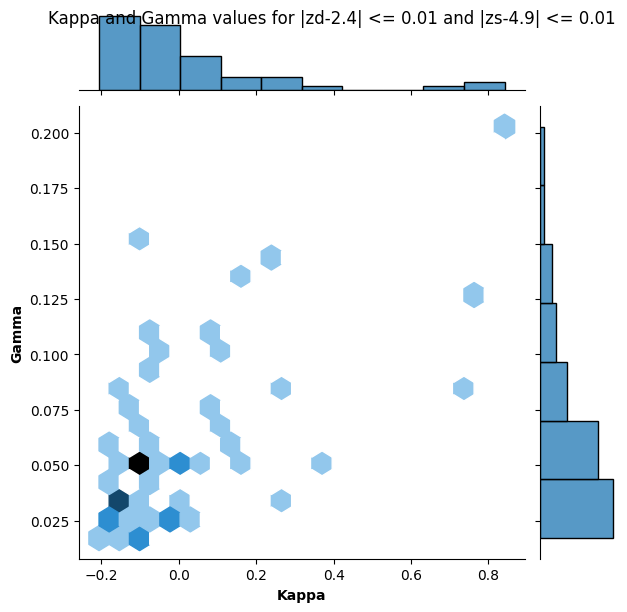

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract entries from distri that meet the criteria
filtered_entries = [entry for entry in distri if abs(entry['zd'] - 2.4) < 0.01 and abs(entry['zs'] - 4.9) < 0.01]

# Extract kappa and gamma values from these entries
kappas = [entry['kappa'] for entry in filtered_entries]
gammas = [entry['gamma'] for entry in filtered_entries]

modified_plot = sns.jointplot(x=kappas, y=gammas, kind='hex', gridsize=20)

# Set custom labels and title
modified_plot.ax_joint.set_xlabel('Kappa', fontweight='bold')
modified_plot.ax_joint.set_ylabel('Gamma', fontweight='bold')
modified_plot.fig.suptitle("Kappa and Gamma values for |zd-2.4| <= 0.01 and |zs-4.9| <= 0.01")

plt.show()
